<a href="https://colab.research.google.com/github/abhishek-kakde/Netflix_clustering_recommender/blob/main/ML_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix MOVIE Clustering and Recommender system**    -


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 - Abhishek Kakde**
##### **Cohort Sydney**


# **Project Summary -**

In [ ]:
from google.colab import drive


**Importing drive from colab**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


**Mounting drive**

In [ ]:
import pandas as pd
import numpy as np

**Importing Pandas and numpy library**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter assignments/ML-Capstone project files/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

**Reading csv file and assigning to df**

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


**Reading csv file and checking first 2 rows of column**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Checking names of columns**

In [ ]:
df.shape

(7787, 12)

**Checking size of dataset. Dataset contains 7787 rows and 12 column**

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**Checking null values in dataset. As we can see that cast,director,country,date_added and rating column has null values**

In [ ]:
null_cast= df.loc[df['cast'].isnull()]
df.drop(null_cast.index,inplace = True)
null_country =df.loc[df['country'].isnull()]
df.drop(null_country.index,inplace = True)
null_date_added =df.loc[df['date_added'].isnull()]
df.drop(null_date_added.index,inplace = True)
null_rating= df.loc[df['rating'].isnull()]
df.drop(null_rating.index,inplace = True)

**Dropping all the null values from these columns except director column**

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1835
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

**Ignoring directors as null values as this can remove many rows from the dataset**

In [ ]:
df.shape

(6643, 12)

**After removing null values we have 6643 rows and 12 columns**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

* **show_id** : Unique ID for every Movie / Tv Show
* **type** : Identifier - A Movie or TV Show
* **title** : Title of the Movie / Tv Show
* **director** : Director of the Movie
* **cast** : Actors involved in the movie / show
* **country** : Country where the movie / show was produced
* **date_added** : Date it was added on Netflix
* **release_year** : Actual Releaseyear of the movie / show
* **rating** : TV Rating of the movie / show
* **duration** : Total Duration - in minutes or number of seasons
* **listed_in** : Genre
* **description**: The Summary description

In [ ]:
df.country.value_counts()

United States                                                   2242
India                                                            894
United Kingdom                                                   331
Japan                                                            220
South Korea                                                      180
                                                                ... 
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Germany, Australia, France, China                                  1
Uruguay, Guatemala                                                 1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 626, dtype: int64

In [ ]:
df['listed_in'].value_counts()

Dramas, International Movies                                                       307
Stand-Up Comedy                                                                    292
Comedies, Dramas, International Movies                                             240
Dramas, Independent Movies, International Movies                                   213
Documentaries                                                                      160
                                                                                  ... 
Anime Series, TV Horror, TV Thrillers                                                1
Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy                           1
TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows                                        1
Anime Series, Crime TV Shows, TV Thrillers                                           1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 474, dtype: int64

**Checking count of movies tv shows produced in  different countries. As we can see that some shows are collectively produced in some countries. So we  will keep first name of these countries.**

In [ ]:
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

**Similarly shows listed in more than one genre, so we will keep the first genre for the show**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6643 entries, 0 to 7785
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6643 non-null   object
 1   type          6643 non-null   object
 2   title         6643 non-null   object
 3   director      4808 non-null   object
 4   cast          6643 non-null   object
 5   country       6643 non-null   object
 6   date_added    6643 non-null   object
 7   release_year  6643 non-null   int64 
 8   rating        6643 non-null   object
 9   duration      6643 non-null   object
 10  listed_in     6643 non-null   object
 11  description   6643 non-null   object
dtypes: int64(1), object(11)
memory usage: 674.7+ KB


**Checking the data type for the columns.**

In [ ]:
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

**Changing datatype for duration column to int**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6643 entries, 0 to 7785
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6643 non-null   object
 1   type          6643 non-null   object
 2   title         6643 non-null   object
 3   director      4808 non-null   object
 4   cast          6643 non-null   object
 5   country       6643 non-null   object
 6   date_added    6643 non-null   object
 7   release_year  6643 non-null   int64 
 8   rating        6643 non-null   object
 9   duration      6643 non-null   int64 
 10  listed_in     6643 non-null   object
 11  description   6643 non-null   object
dtypes: int64(2), object(10)
memory usage: 674.7+ KB


In [ ]:
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'NR',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

**Checking the different types of ratings in rating column.**

In [ ]:
rating_keys = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_keys, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

**Grouping the ratings into Adults,Teens, Young Adults, Older Kids,Kids according to the ratinng standards**

**G – General Audiences,PG – Parental Guidance Suggested,PG-13 – Parents Strongly Cautioned,R – Restricted,NC-17 – Adults Only,Not Rated (NR)  etc**

**Importing data visualization libraries, like matplotlib, seaborn**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Count of movies/shows by age_rating'}, xlabel='rating', ylabel='count'>

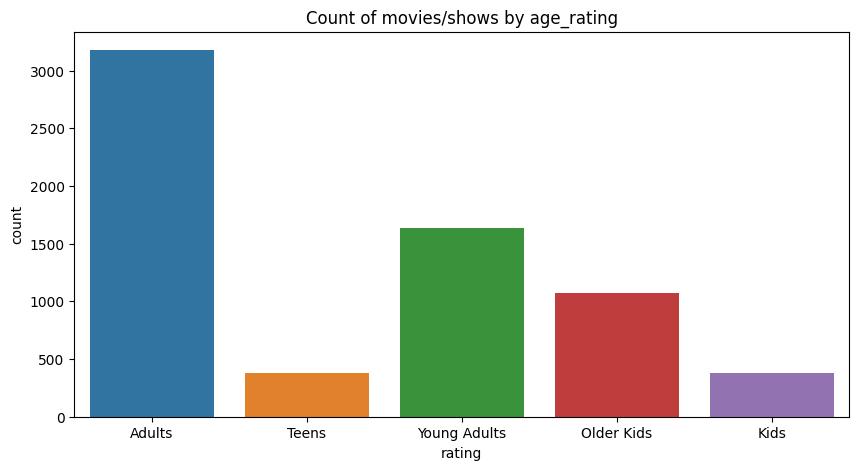

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Count of movies/shows by age_rating')
sns.countplot(x='rating',data=df)


*** As we can see that most of the Tv shows/movies belong to Adults categories**

*** Then we have young adults , followed by older kids, then kids and then teens**

**Importing plotly express for more attractive visualization**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = px.pie(df, values= df['type'].value_counts(), names=df['type'].unique(), title='Movies and TV Shows in the dataset')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()


**We can see that 1882 are movies and 4761 Tv shows in our cleaned dataset**

In [ ]:
# Top 10 directors in the dataset
import plotly.graph_objects as go
top_directors = df['director'].value_counts().nlargest(10)

fig = go.Figure(go.Bar(
    x=top_directors.values,
    y=top_directors.index,
    orientation='h'))

fig.update_layout(title='Top 10 Directors by Movie Count',
                  xaxis_title='Number of Movies',
                  yaxis_title='Director')


**We can see that most of the films are directed by Raul Campos,Jan Suter followed by ,Marcus Raboy then comes Jay Karas.**

**Top 10 directors can be seen above**

In [ ]:
top_countries = df['country'].value_counts().nlargest(10)

fig = px.bar(top_countries,
             orientation='h',
             color=top_countries.index,
             labels={'index': 'Country', 'value': 'Number of Shows'},
             title='Top 10 Countries with the Highest Number of Shows')

fig.show()

**We can see that most of the shows are from United States of America with 2541 shows then comes India with  927 shows**

In [ ]:
top_genres = df['listed_in'].value_counts().nlargest(10)

fig = px.bar(top_genres,
             orientation='h',
             color=top_genres.index,
             labels={'index': 'Genres', 'value': 'Show types'},
             title='Top 10 Genres')

fig.show()

**Most of the shows are Dramas in our dataset with 1348 shows then comes 1043 number of comedy shows**

**Least viewed are the Horror Movies**  

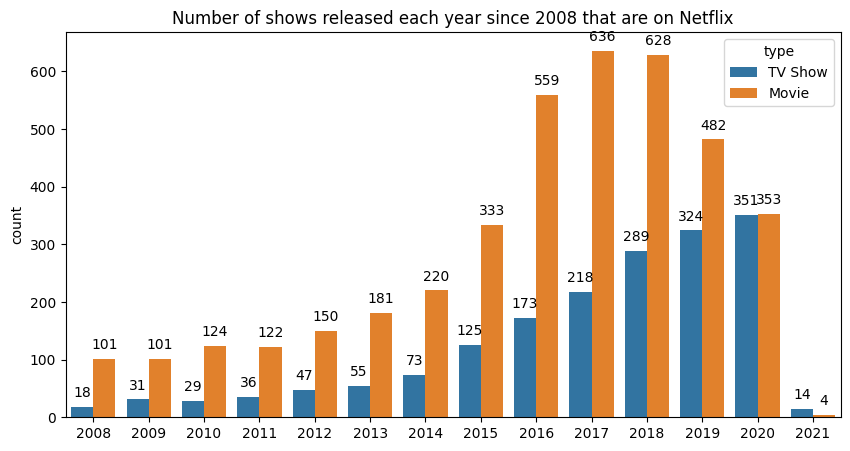

In [ ]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**As the dataset is till 2021 we can see detailed stats till 2020. We can see that in year 2017 most movies were released while in year 2020 most Tv shows were released. Also the graph shows the increasing trend for the Tv shows. This tells us about the interests of the audience watchig Netflix**

In [ ]:
# # length of movie analysis
fig = px.histogram(df[df['type']=='Movie'], x='duration',
                   labels={'duration': 'Duration (minutes)'},
                   title='Movie Duration Distribution')

fig.update_layout(
    xaxis_title='Duration (minutes)',
    yaxis_title='Count',
    autosize=False,
    width=800,
    height=400
)

fig.show()

**We can see that most of the movies has duration between 94-95 minitues while there are few movies beyond 200 minutes duration.Also there is one movie beyond 300 minutes duration**

In [ ]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()

count    4761.000000
mean      101.834068
std        27.072238
min         8.000000
25%        88.000000
50%       100.000000
75%       116.000000
max       312.000000
Name: duration, dtype: float64

**We can see the distribution of the movie duaration as avg duration of the movie is 101 minutes while  max duration reached of the movie is 312 minutes. Also least duration is 8 minutes**

In [ ]:
fig = px.box(df[df['type'] == 'Movie'], x='duration', title='Movie Duration Distribution')

fig.update_layout(
    xaxis_title='Duration (minutes)',
    yaxis_title='',
    autosize=False,
    width=800,
    height=400
)

fig.show()

**Outliers can be detected as 1 movie with more than 300 minute duration can be found and also the movie with 8 minutes duaration can also be found in above box plot.**

In [ ]:
df['title'][df['duration']>300]

957    Black Mirror: Bandersnatch
Name: title, dtype: object

In [ ]:
df['title'][df['duration']<8]

0                                        3%
5                                        46
11                                     1983
24      ​SAINT SEIYA: Knights of the Zodiac
29                                 #blackAF
                       ...                 
7759                              Zak Storm
7767                     Zindagi Gulzar Hai
7775                             Zoids Wild
7779                              Zona Rosa
7785                  Zumbo's Just Desserts
Name: title, Length: 1846, dtype: object

Actually these are the episodes of the Tv shows or series which has 8 min episodes inside them so these are not movies.

In [ ]:
fig = px.line(df[df['type'] == 'Movie'].groupby('release_year')['duration'].mean(),
              labels={'release_year': 'Year', 'duration': 'Length of Movie (minutes)'},
              title='Average Movie Length Over the Years')

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Length of Movie (minutes)',
    autosize=False,
    width=800,
    height=400
)

fig.show()

**We can observe that the movie length after 1965 is continuously redcuing according to the graph. This tells us about the audience behaviour that they dont like lengthy movies anymore**

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

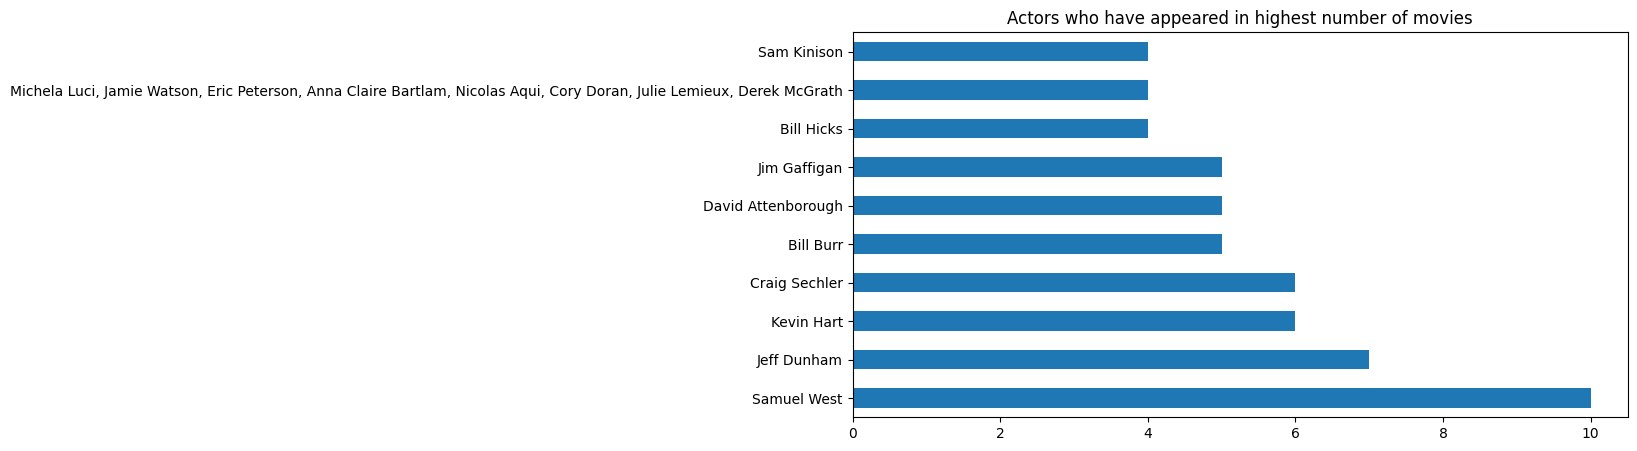

In [ ]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

**According to the graph we can see that Samuel West has appeared in more number of movies among all the actors then comes the Jeff Dunham**

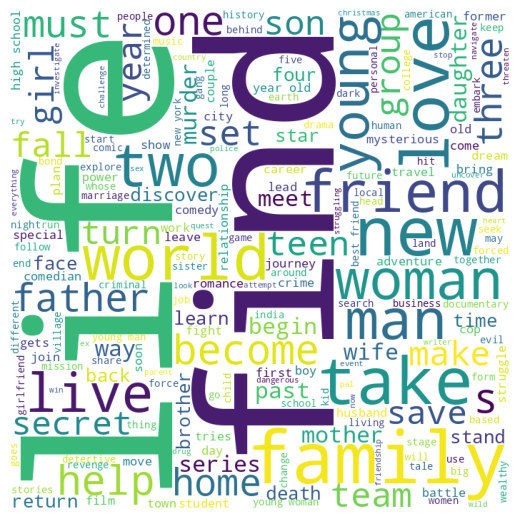

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

**Here we have used wordcloud to find most occuring words among the movies/Tv shows description in the dataset.**


In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Importing warnings to avoid warnings after executing code**

In [ ]:
df2 = df.copy()

In [ ]:
df2.fillna('',inplace = True)

In [ ]:
df2['director'][4]

'Robert Luketic'

**Removing white spaces between words for algorithms**

In [ ]:
type(df2['director'])

pandas.core.series.Series

In [ ]:
df2['director']= list(map(lambda x: x.replace(" ", ""), df2['director'].tolist()))
df2['cast'] = list(map(lambda x: x.replace(" ", ""), df2['cast'].tolist()))
df2['country']= list(map(lambda x: x.replace(" ", ""), df2['country'].tolist()))
df2['listed_in']= list(map(lambda x: x.replace(" ", ""), df2['listed_in'].tolist()))
df2['description']= list(map(lambda x: x.replace(" ", ""), df2['description'].tolist()))

In [ ]:
df2['tag'] = (df2['director'] + ' ' +
                                df2['cast'] +' ' +
                                df2['country'] +' ' +
                                df2['listed_in'] +' ' +
                                df2['description'])

**Making single column 'tag' for all description, cast, director i.e key informants**

In [ ]:
df2['tag'][1]

'JorgeMichelGrau DemiánBichir,HéctorBonilla,OscarSerrano,AzaliaOrtiz,OctavioMichel,CarmenBeato Mexico Dramas AfteradevastatingearthquakehitsMexicoCity,trappedsurvivorsfromallwalksoflifewaittoberescuedwhiletryingdesperatelytostayalive.'

In [ ]:
df2.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'tag'],
      dtype='object')

In [ ]:
df2 = df2[['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description', 'tag']]

**Removing any non ascii characters from the words**

In [ ]:
import re, string, unicodedata
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
df2['tag'] = remove_non_ascii(df2['tag'])

In [ ]:
df2['tag'] = remove_non_ascii(df2['tag'])

**Creating dataframe with only 3 variables for the model**

In [ ]:
main = df2[['show_id','title','tag']]

In [ ]:
main['tag'] = df2['tag'].apply(lambda x:x.lower())

In [ ]:
import re, string, unicodedata
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
main['tag'] = remove_non_ascii(main['tag'])

In [ ]:
main.head(2)

,show_id,title,tag
0,s1,3%,"joaomiguel,biancacomparato,michelgomes,rodolf..."
1,s2,7:19,"jorgemichelgrau demianbichir,hectorbonilla,osc..."


**Importing natural language toolkit for removing stopwords if any**

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words
def stopwords(text):
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# Removing stop words
main['tag'] = main['tag'].apply(stopwords)

**Making function to remove punctuation from the text**

In [ ]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
main['tag'] = main['tag'].apply(remove_punctuation)

In [ ]:
main['tag'][3]

'shaneacker elijahwoodjohncreillyjenniferconnellychristopherplummercrispinglovermartinlandaufredtatasciorealanoppenheimertomkane unitedstates actionadventure inapostapocalypticworldragdollrobotshideinfearfromdangerousmachinesouttoexterminatethemuntilabravenewcomerjoinsthegroup'

**Instead of stemming we use lemmatizing, as stemming sometimes removes meaningful words from the data**

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
# function to lemmatize the corpus
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
main['tag'] = lemmatize_verbs(main['tag'])

In [ ]:
main['tag'][1]

'jorgemichelgrau demianbichirhectorbonillaoscarserranoazaliaortizoctaviomichelcarmenbeato mexico dramas afteradevastatingearthquakehitsmexicocitytrappedsurvivorsfromallwalksoflifewaittoberescuedwhiletryingdesperatelytostayalive'


TfidfVectorizer is a feature extraction technique commonly used in natural language processing (NLP) and information retrieval. It stands for Term Frequency-Inverse Document Frequency Vectorizer. This technique is widely employed to convert a collection of raw documents into a matrix of TF-IDF features.



In [106]:
# @title Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Using TFIDF vectorizer to vectorize the corpus
# max features = 15000 to prevent system from crashing
tfidf = TfidfVectorizer( stop_words='english',max_features = 15000)
X = tfidf.fit_transform(main['tag'])

In [107]:
X.shape

(6643, 15000)

In [108]:
X = X.toarray()

Using Principal component analysis for reducing dimensions for efficient and Feature Selection/Extraction

PCA, or Principal Component Analysis, is a dimensionality reduction technique widely used in machine learning and statistics. Its primary goal is to reduce the dimensionality of a dataset while preserving as much of the original variability as possible. PCA works by transforming the original features into a new set of uncorrelated features, called principal components.

* Centering the Data:

The first step in PCA is to center the data by subtracting the mean of each feature from the data points. This ensures that the data is centered around the origin.

* Calculating the Covariance Matrix:

The next step is to compute the covariance matrix of the centered data. The covariance matrix provides information about the relationships between different features.

* Computing Eigenvectors and Eigenvalues:

PCA then calculates the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions of maximum variance in the data, and the eigenvalues indicate the magnitude of the variance in those directions.

* Sorting and Selecting Principal Components:

The eigenvectors are sorted based on their corresponding eigenvalues in descending order. The principal components are selected from the top eigenvectors, as they capture the most variance in the data.

* Projecting Data onto Principal Components:

The original data is then projected onto the selected principal components. This results in a new set of uncorrelated features, which are linear combinations of the original features.

**Using sklearn to import PCA and fitting array X to it**

In [ ]:
from sklearn.decomposition import PCA
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

The explained_variance_ratio_ attribute in scikit-learn's PCA (Principal Component Analysis) provides the ratio of variance explained by each of the selected principal components. When you apply PCA to a dataset, it transforms the original features into a set of principal components. The explained_variance_ratio_ gives the proportion of the dataset's variance that lies along the axis of each principal component.

* For each principal component, explained_variance_ratio_ tells you the fraction of the dataset's total variance that is captured by that component.

* The values in explained_variance_ratio_ are sorted in descending order, so the first element corresponds to the highest amount of variance explained, the second element to the second highest, and so on.

* We can use this information to decide how many principal components to retain based on the amount of variance you want to preserve. If you set the number of components when creating the PCA object (as in the previous example), scikit-learn will automatically retain that number of components with the highest variance.

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


fig = go.Figure()


fig.add_trace(go.Scatter(x=np.arange(1, len(cumulative_variance) + 1),
                         y=cumulative_variance,
                         mode='lines',
                         name='Cumulative Explained Variance'))


fig.update_layout(title='PCA - Cumulative Explained Variance vs Number of Components',
                  xaxis_title='Number of Components',
                  yaxis_title='Cumulative Explained Variance',
                  width=800,
                  height=400)


fig.show()

* We find that 100% of the variance is explained by more than 6000 components.
* Also, more than 80% of the variance is explained by 4500 components.
* Hence to simplify the model, and reduce dimensionality, we can take the top 4500 components, which will still be able to capture more than 80% of variance.

In [102]:
# reducing the dimensions to 4500 using pca
pca = PCA(n_components=4500,random_state=42)
pca.fit(X)

ValueError: ignored

Here, X_pca will contain the transformed data with reduced dimensionality.

In [103]:
# transformed features
x_pca = pca.transform(X)

NotFittedError: ignored

The transform method in scikit-learn's PCA (Principal Component Analysis) is used to project the input data onto the selected principal components. After fitting a PCA model to a dataset using the fit method, you can use the transform method to apply the dimensionality reduction to new data or the same data.

In [ ]:
x_pca.shape

(6643, 4500)

**Using Kmeans for clustering the data and calculating inertia**

We are attempting to perform the elbow method to determine the optimal number of clusters (K) for your KMeans algorithm. The elbow method involves running KMeans with different values of K and plotting the within-cluster sum of squares (WCSS) against the number of clusters. The "elbow" in the plot is usually considered the point where increasing the number of clusters doesn't significantly decrease the WCSS.


Text(0, 0.5, 'WCSS')

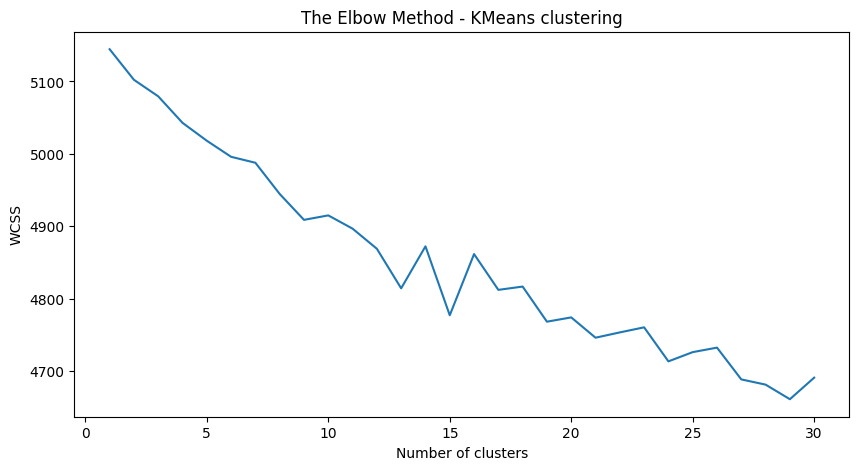

In [ ]:
from sklearn.cluster import KMeans
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Here, the wcss list stores the WCSS for each value of K. The code then plots the elbow curve, and you can visually inspect the plot to determine the optimal number of clusters (K). The elbow is typically the point where the reduction in WCSS starts to slow down.


The elbow method is a technique used in clustering analysis to determine the optimal number of clusters. It involves plotting the within-cluster sum of squares (WCSS) for different cluster numbers and identifying the “elbow” point where WCSS starts to level off

Here 8 can be the elbow point.

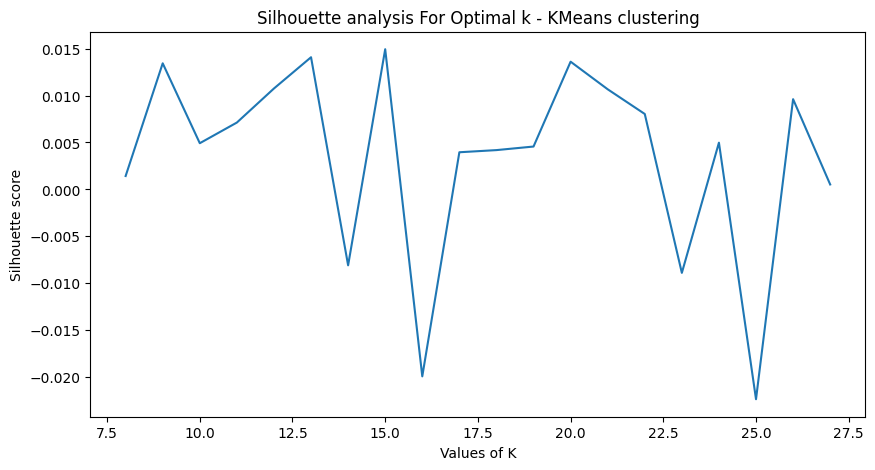

In [77]:
from sklearn.metrics import silhouette_score
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(8,28)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

We are using the silhouette score to evaluate the quality of clustering for different values of K (number of clusters) in your KMeans algorithm. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Higher silhouette scores indicate better-defined clusters.

'silhouette_avg' list stores the silhouette score for each value of K. The code then plots the silhouette scores against the number of clusters. The optimal number of clusters is typically associated with the highest silhouette score.

The ideal number of clusters is often associated with the peak or plateau in the silhouette score. Higher silhouette scores indicate better-defined clusters.

We try to find number of cluster by findng scores as the graph is confusing

In [79]:
data = x_pca

In [80]:
%%time
n_cluster= range(1,28)
kmeans = [KMeans(n_clusters = i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]


CPU times: user 15min 27s, sys: 1min 3s, total: 16min 31s
Wall time: 10min 7s


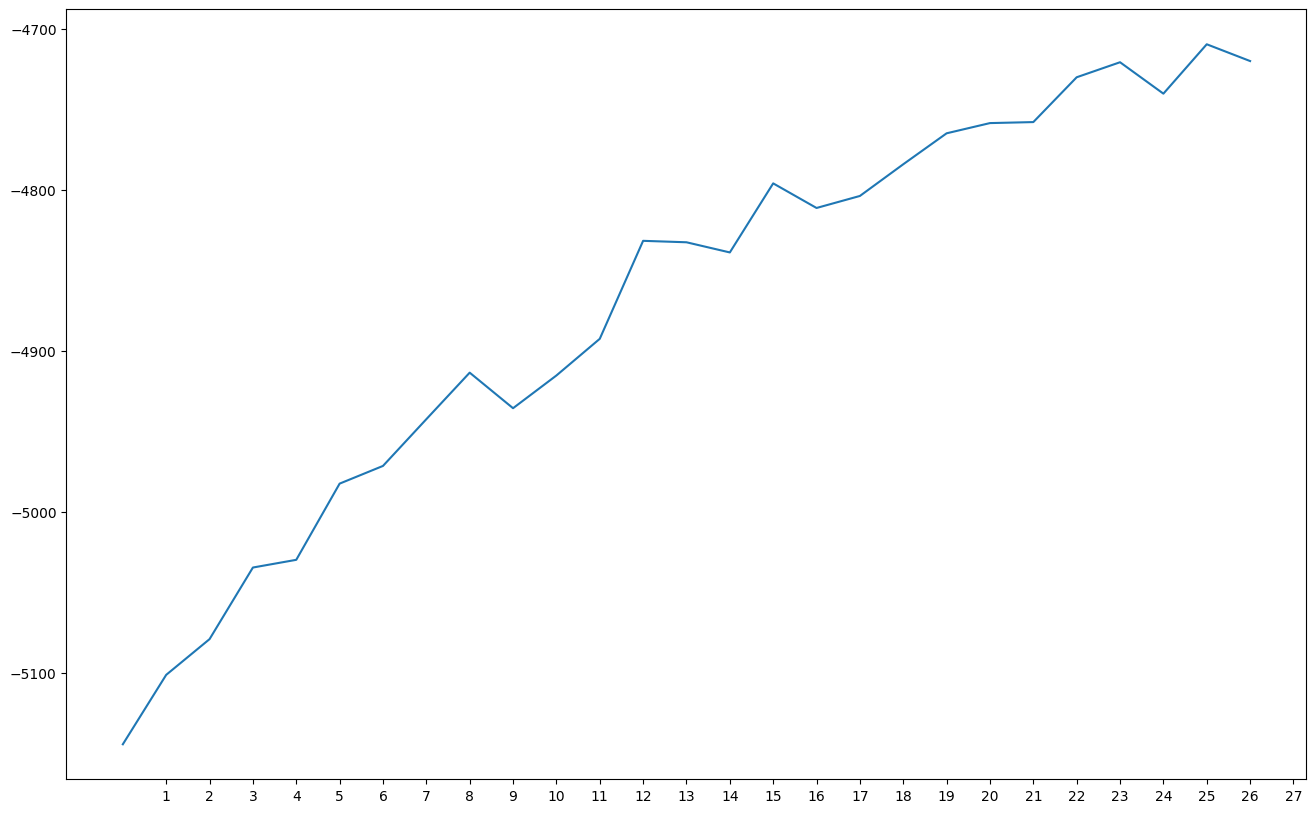

In [81]:
f = plt.figure(1,figsize =(16,10))
plt.plot(scores)
_ = plt.xticks(n_cluster)

In [82]:
scores= np.array(scores)
dif_scores = scores/scores[0]
dif_scores = np.diff(dif_scores)
n_clusters = np.argwhere(dif_scores < np.quantile(dif_scores,0.9))[-1][0]
print('Optimal number of clusters :',n_clusters)

Optimal number of clusters : 25


In [83]:
# Clustering the data
kmeans = KMeans(n_clusters=25,init='k-means++',random_state=42)
kmeans.fit(x_pca)

KMeans(n_clusters=25, random_state=42)

In [84]:
silhoutte_score_data = {}

In [85]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(4714.604276728685, 0.013799199016190877)


In [86]:
silhoutte_score_data['k_means'] =kmeans_silhouette_score

In [87]:
# Adding a kmeans cluster number attribute
main['kmeans_cluster'] = kmeans.labels_

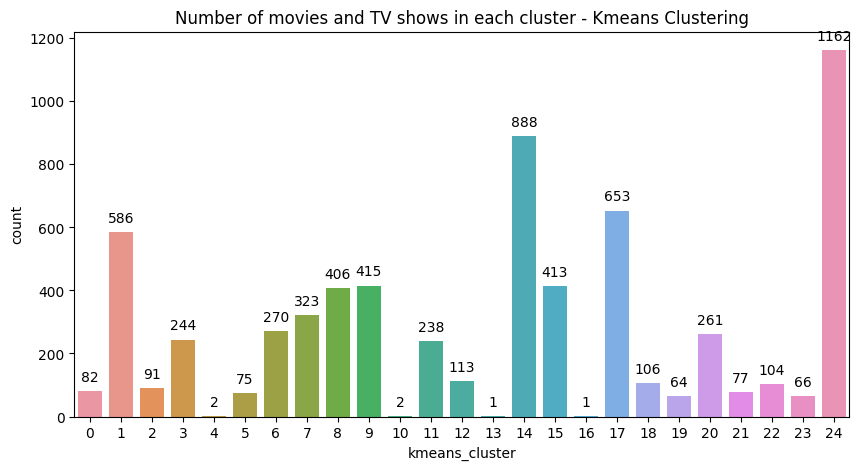

In [88]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=main)
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Building wordcloud to find most occuring words in the description**

In [89]:
# Building a wordcloud for the movie tag
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in main[main['kmeans_cluster']==cluster_num].tag.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

In [90]:
main.head(2)

,show_id,title,tag,kmeans_cluster
0,s1,3%,joaomiguelbiancacomparatomichelgomesrodolfoval...,15
1,s2,7:19,jorgemichelgrau demianbichirhectorbonillaoscar...,12


ValueError: ignored

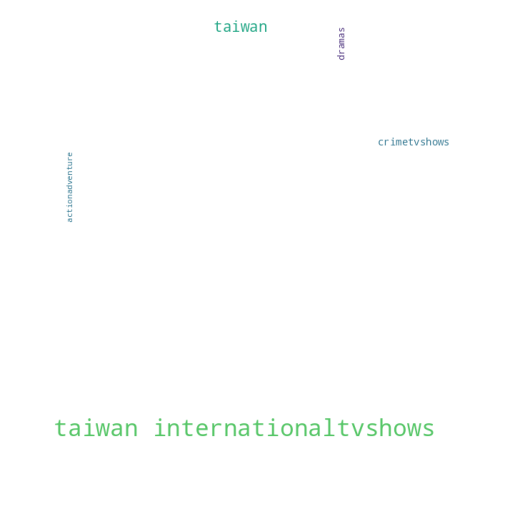

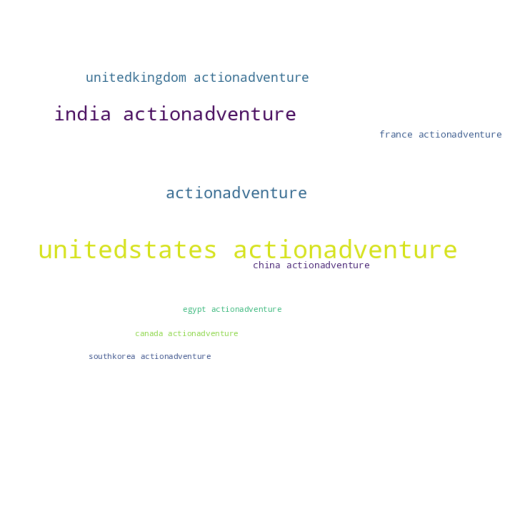

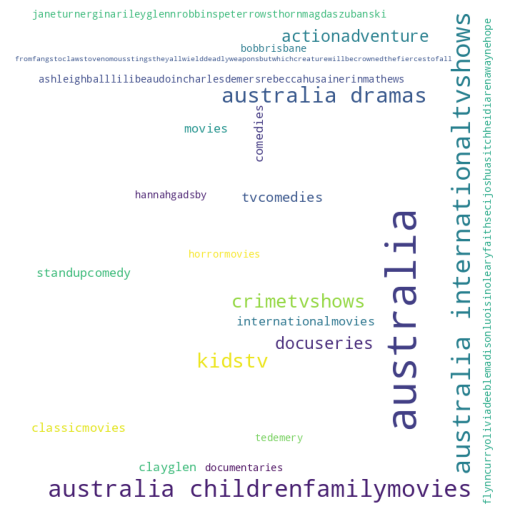

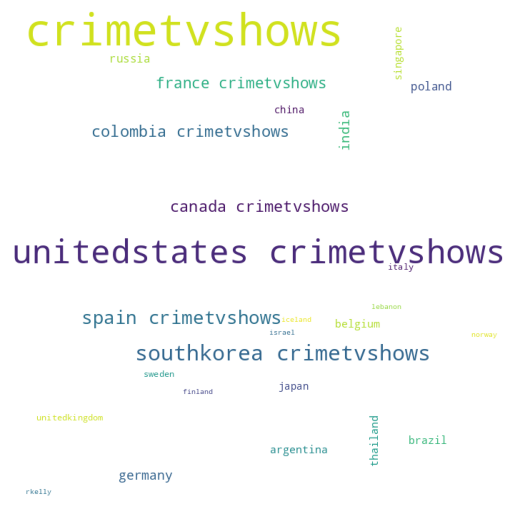

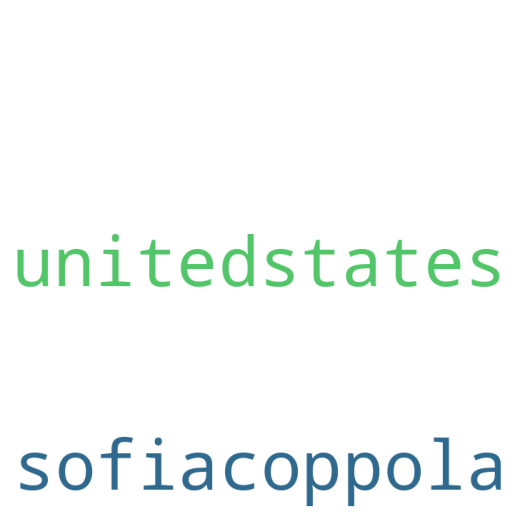

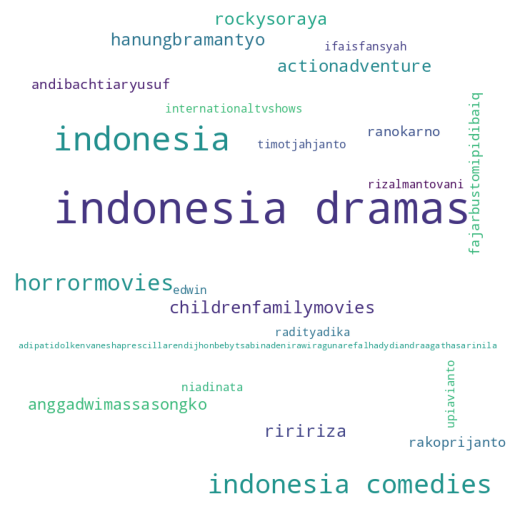

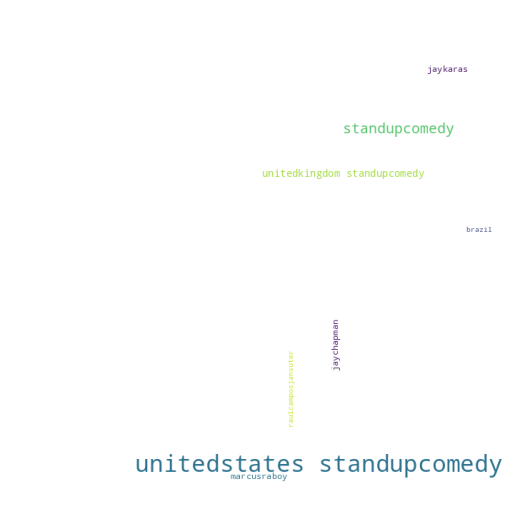

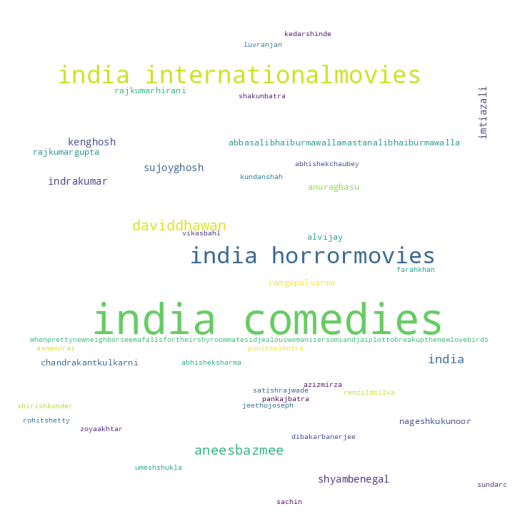

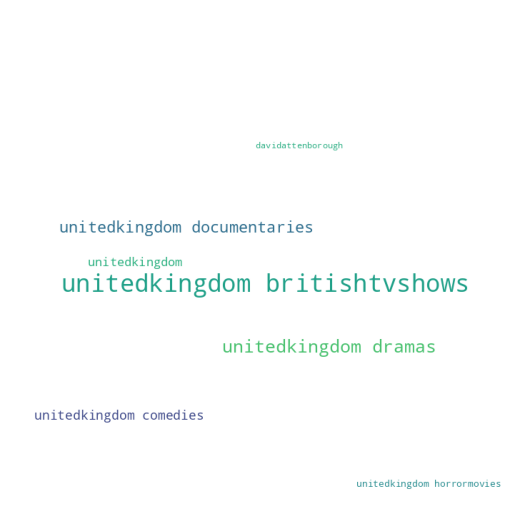

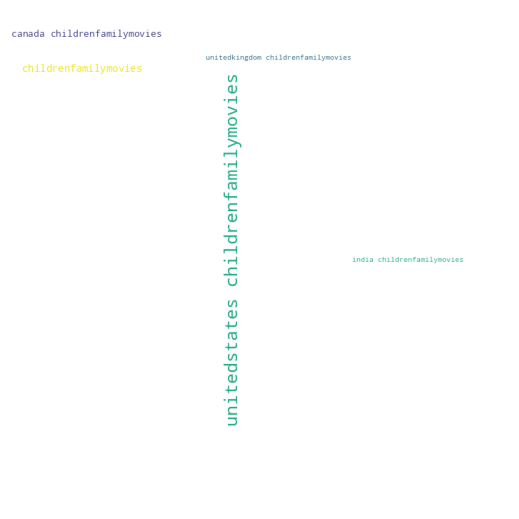

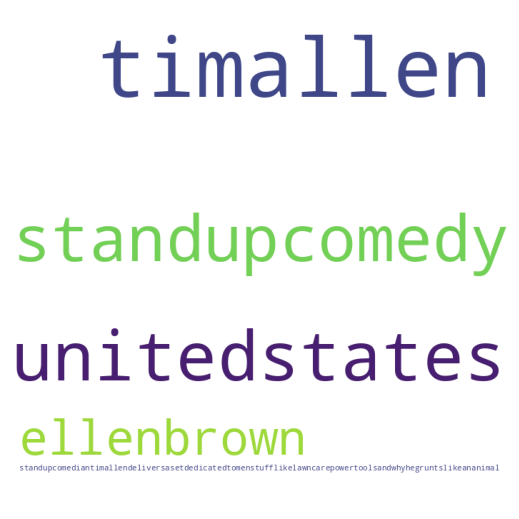

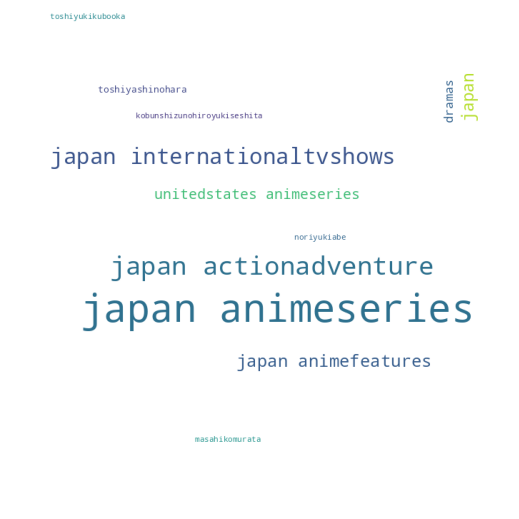

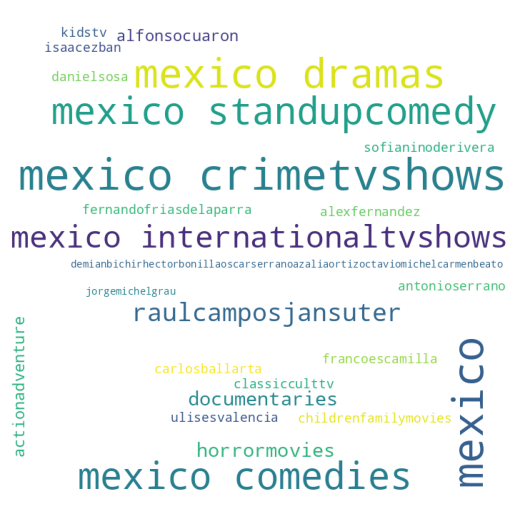

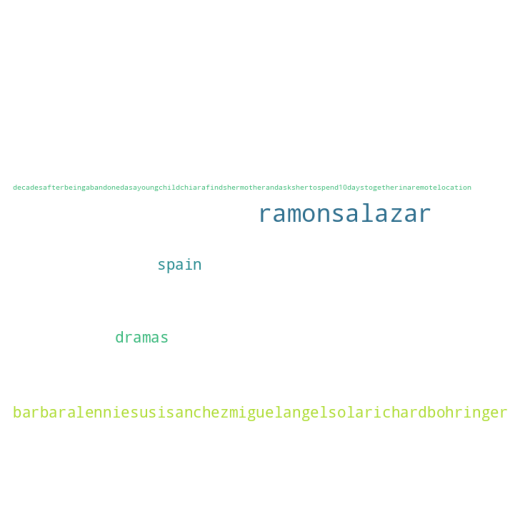

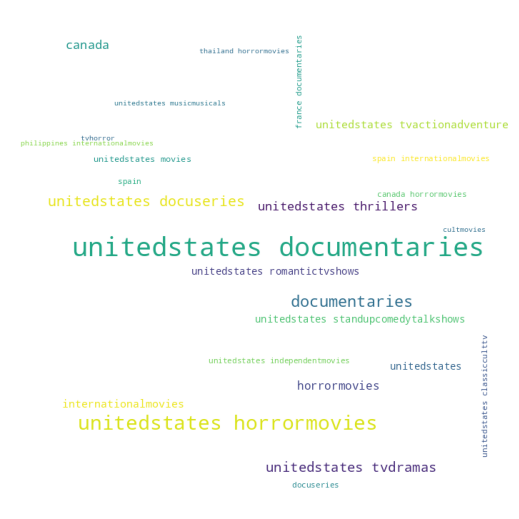

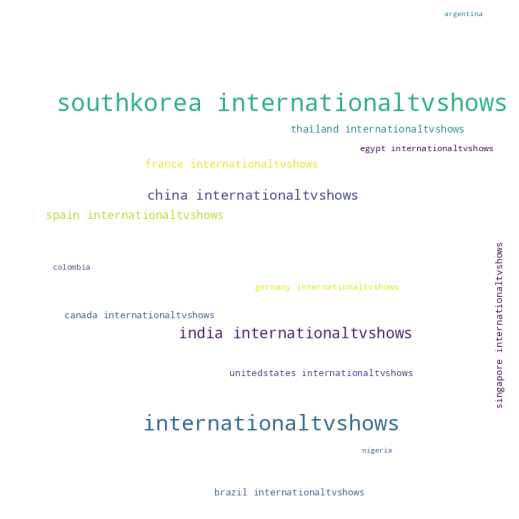

In [93]:
for i in range(0,25):
  kmeans_worldcloud(i)

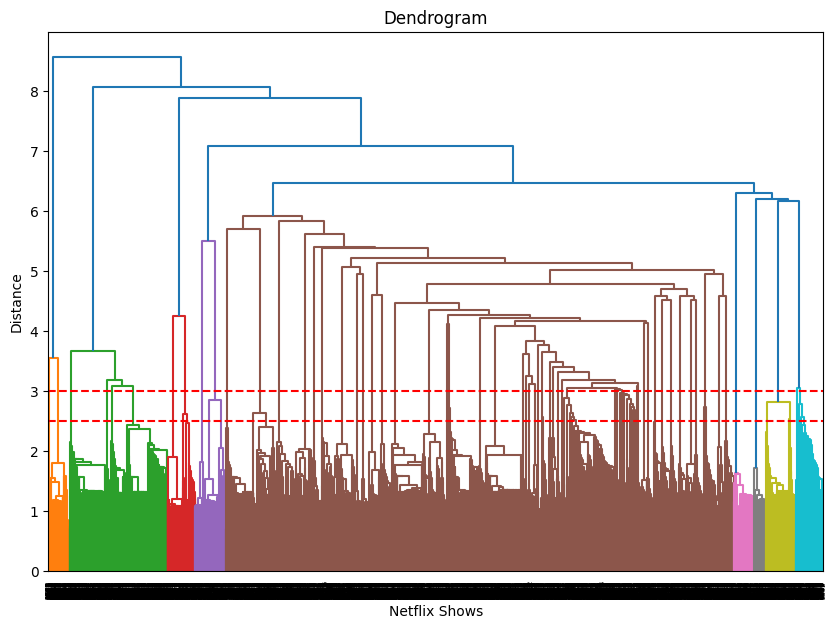

In [94]:
import scipy.cluster.hierarchy as shc
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3, color='r', linestyle='--')
plt.axhline(y= 2.5, color='r', linestyle='--')

In [95]:
main2 = main[['show_id', 'title', 'tag']]

In [96]:
main2.shape

(6643, 3)

##DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is utilized to identify outliers or anomalies within the Netflix dataset. Outliers could represent unique or rare content that doesn't fit neatly into traditional genres. By detecting these outliers, Netflix gains insights into unconventional user preferences and can offer recommendations that go beyond mainstream genres.

DBSCAN's ability to identify dense regions of data points is valuable in uncovering content that might be overlooked by other clustering methods. This enhances the diversity of recommendations and ensures that users are exposed to a variety of content options, potentially broadening their viewing habits.

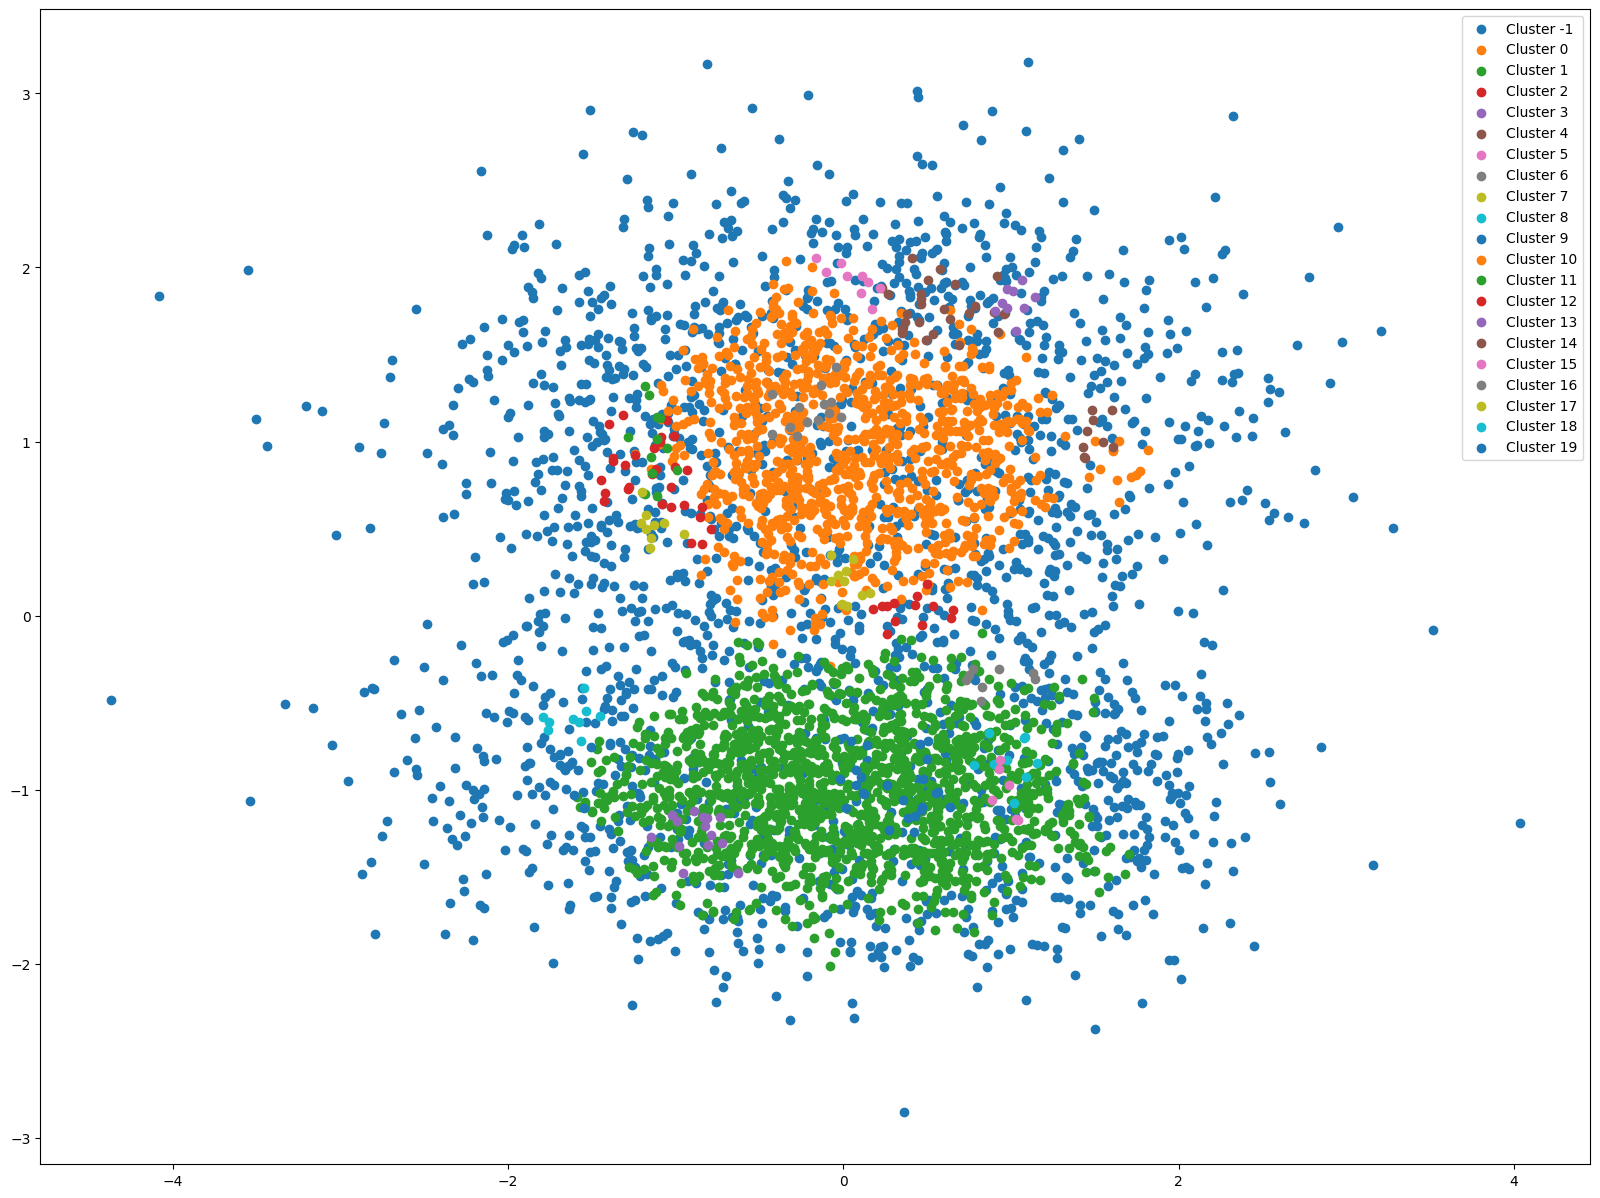

In [97]:
# @title DBSCAN
from numpy import unique, where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

# initialize the data set we'll work with
training_data, X= make_classification(
    n_samples=4808,
    n_features=3,
    n_informative=1,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# define the model
dbscan_model = DBSCAN(eps=0.25, min_samples=9)

# train the model
dbscan_labels = dbscan_model.fit(training_data)

# assign each data point to a cluster
dbscan_result = dbscan_labels.labels_

# get all of the unique clusters
dbscan_clusters = unique(dbscan_result)
plt.figure(figsize=(20, 15))
# plot the DBSCAN clusters
for cluster in dbscan_clusters:
    # get data points that fall in this cluster
    index = where(dbscan_result == cluster)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1], label=f'Cluster {cluster}')

# show the DBSCAN plot
pyplot.legend()
pyplot.show()

In [99]:
main2['DBSCAN_cluster'] = dbscan_result

ValueError: ignored

In [ ]:
main['DBSCAN_cluster'].unique()

For DBSCAN: Points labeled as outliers or noise may be assigned the label -1.

In [ ]:
dbscan_model = DBSCAN(eps=0.25, min_samples=9)
dbscan_labels = dbscan_model.fit_predict(training_data)

# Filter out noise points (-1) as they don't contribute to silhouette score
non_noise_points = dbscan_labels != -1

# Check if there are at least two clusters for silhouette score calculation
unique_clusters = np.unique(dbscan_labels[non_noise_points])
if len(unique_clusters) < 2:
    print("Not enough clusters for silhouette score calculation.")
else:
    # Calculate silhouette score for non-noise points
    silhouette_avg = silhouette_score(training_data[non_noise_points], dbscan_labels[non_noise_points])
    print(f"Silhouette Score: {silhouette_avg}")
    silhoutte_score_data['DBSCAN'] =silhouette_avg

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='DBSCAN_cluster',data=main)
plt.title('Number of movies and tv shows in each cluster - DBSCAN Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=18, affinity='euclidean', linkage='ward')
agg_labels = hierarchical.fit_predict(x_pca)

In [ ]:
silhouette_avg = silhouette_score(x_pca, agg_labels)
print(f"Silhouette Score: {silhouette_avg}")

In [ ]:
silhoutte_score_data['hierarchical_cluster'] =silhouette_avg

In [ ]:
silhoutte_score_data

In [ ]:
# Adding a hierarchical cluster number attribute
main['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=main)
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
df_scores = pd.DataFrame(silhoutte_score_data.items(),columns=['Algorithms', 'Silhoutte_scores'])

In [ ]:
plt.bar(df_scores['Algorithms'], df_scores['Silhoutte_scores'])

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Silhoutte_scores comparison')

# Display the bar graph
plt.show()

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in main[main['hierarchical_cluster']==cluster_num].tag.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

In [ ]:
for i in range(0,18):
  hierarchical_worldcloud(i)


In [ ]:
# defining a new df for building a recommender system
recommender_df = pd.merge(df, main, on=['show_id','title'], how='inner')

In [ ]:
recommender_df = recommender_df[['show_id', 'type', 'title', 'tag', 'hierarchical_cluster']]

In [ ]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [ ]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['tag'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
cosine_similarity.shape

In [ ]:
# Developing a function to get 5 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    rmds = list(series.iloc[1:6].index)
    # list with the titles of the best 10 matching movies
    for i in rmds:
      recommend_content.append(list(recommender_df.index)[i])
    print("Top 5 recommendation for you are", title)
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:
recommender_df.head(2)

In [ ]:
recommender_df['show_id'][-100:-80]

In [ ]:
# Recommendations for 'Zindagi Na Milegi Dobara'
recommend('Zindagi Na Milegi Dobara')

In [ ]:
recommend('Yoga Hosers')

In [ ]:
recommend('Yamla Pagla Deewana 2')

In [ ]:
recommend('Winchester')

In [ ]:
recommend('BoJack Horseman')

In [ ]:
recommend('Peaky Blinders')

##Conclusion

The Netflix Clustering and Recommender System Project aims to elevate the streaming experience by leveraging the power of unsupervised learning. Through KMeans, Agglomerative Hierarchical Clustering, and DBSCAN, the project enhances content organization, providing users with a more refined and diverse selection of recommendations. The interactive Recommender System further personalizes the user experience, ensuring that Netflix remains at the forefront of delivering content that resonates with each individual viewer. As streaming platforms continue to evolve, the integration of machine learning techniques becomes increasingly crucial in meeting the ever-growing expectations of users worldwide.